<a href="https://colab.research.google.com/github/pra1608/Risk-Analysis/blob/master/ME780Exam17dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Question 1: Fit a non-linear regression (for degree=2,3,4,5, and 6) model for the predictor (X) in the data. Compare the non-linear regression model with the KNN ( for K=1,2,3,5,7). Use LOOCV to calculate MSE for this comparison.

Importing neccessary Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot as plt


Reading the the input data file for First Question

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/ME780Exam/New folder/193109012@iitb.ac.in_Q1.csv')

Data Preprocessing with data scaling etc.

In [3]:
X = df1['X'].values.reshape(-1,1)
Y = df1['Y'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)  # train_test split
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
Y_test = scaler.fit_transform(y_test)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)


(160, 1)
(40, 1)
(40, 1)
(160, 1)


###***Plot of mean squared error (for both training and testing) vs degree of the polynomial for the polynomial regression***


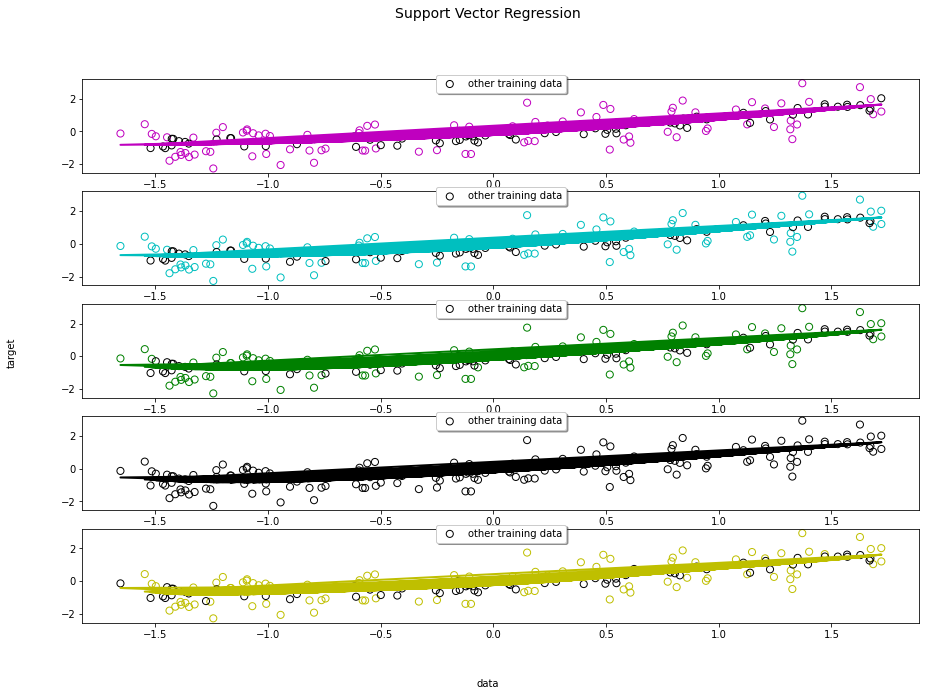

In [5]:
model_color = ['m', 'c', 'g','k','y']
edata = list()         # mse for training data
scr = list()           # R2 score for test data
edata1 = list()        # mse for test data
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 10), sharey=True)
for ix, degree in enumerate([2, 3, 4, 5, 6]):
  # fitting SVR with poly kernel and degree
  model = SVR(kernel='poly', C=10, degree=degree,epsilon = 0.4,coef0 = 1)
  # LOOCV 
  cv = LeaveOneOut()
  model.fit(X_train,Y_train.reshape(-1))

  scores = cross_val_score(model, X_train, Y_train.reshape(-1), scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  y_pred = model.predict(X_test)
  #print(y_pred)
  scr2 = model.score(X_test,Y_test)
  edata1.append(mean_squared_error(Y_test.reshape(-1), y_pred))
  scr.append(scr2) 

  scores = np.absolute(scores)
  edata.append(np.mean(scores))
  #Plotting Support vector regression for data
  axes[ix].plot(X_train, model.predict(X_train), color=model_color[ix], lw=2)
  axes[ix].scatter(X_train[model.support_], Y_train[model.support_], facecolor="none",
                    edgecolor=model_color[ix], s=50,)
  axes[ix].scatter(X_train[np.setdiff1d(np.arange(len(X_train)), model.support_)],
                    Y_train[np.setdiff1d(np.arange(len(X_train)), model.support_)],
                    facecolor="none", edgecolor="k", s=50,
                    label='other training data')
  axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                  ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

Plot of mean squared error (for both training and testing) vs degree of the polynomial 

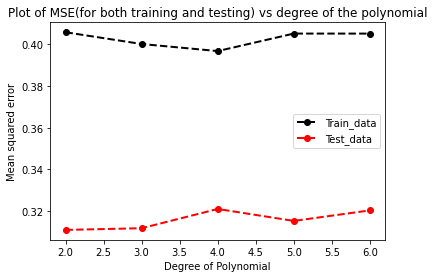

In [6]:
plt.figure()
plt.plot([2,3,4,5,6],edata,'--ko',label="Train_data",LineWidth = 2)
plt.plot([2,3,4,5,6],edata1,'--ro',label="Test_data",LineWidth = 2)
plt.title('Plot of MSE(for both training and testing) vs degree of the polynomial')
plt.legend(loc = "best")
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean squared error')
plt.savefig("MSE vs poly degree", dpi=150)

###***Plot of mean squared error (for both training and testing) vs k for KNN regression***

<Figure size 432x288 with 0 Axes>

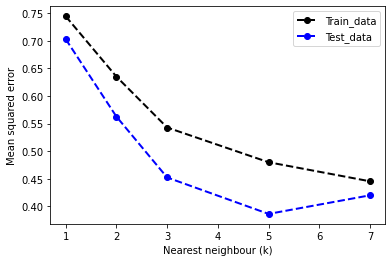

<Figure size 432x288 with 0 Axes>

In [7]:
ekdata = list()         #MSE for training data
skcr = list()
ekdata1 = list()        # MSE for test data
for i in [1,2,3,5,7]:
  # KNN regression model
  neigh = KNeighborsRegressor(n_neighbors=i)
  neigh.fit(X_train, Y_train)
  #LOOCV
  cv = LeaveOneOut()
  scores = cross_val_score(neigh, X_train, Y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  y_pred = neigh.predict(X_test)
  scr2 = neigh.score(X_test,Y_test)
  ekdata1.append(mean_squared_error(Y_test, y_pred))
  skcr.append(scr2) 

  scores = np.absolute(scores)
  ekdata.append(np.mean(scores))
#Plotting MSE vs Nearest neighbour
plt.figure()
plt.plot([1,2,3,5,7],ekdata,'--ko',label="Train_data",LineWidth = 2)
plt.plot([1,2,3,5,7],ekdata1,'--bo',label="Test_data",LineWidth = 2)
plt.legend(loc = "best")
plt.xlabel('Nearest neighbour (k)')
plt.ylabel('Mean squared error')
plt.savefig("MSE vs Nearest neigh",dpi = 150)
plt.figure()